In [1]:
import trendln
from libs.pubsub import get_ps_1
import matplotlib.pyplot as plt
from custom_package import candle
import numpy as np
import datetime
from libs.values import isNonTradingDay
import os
import pickle
import yfinance as yf

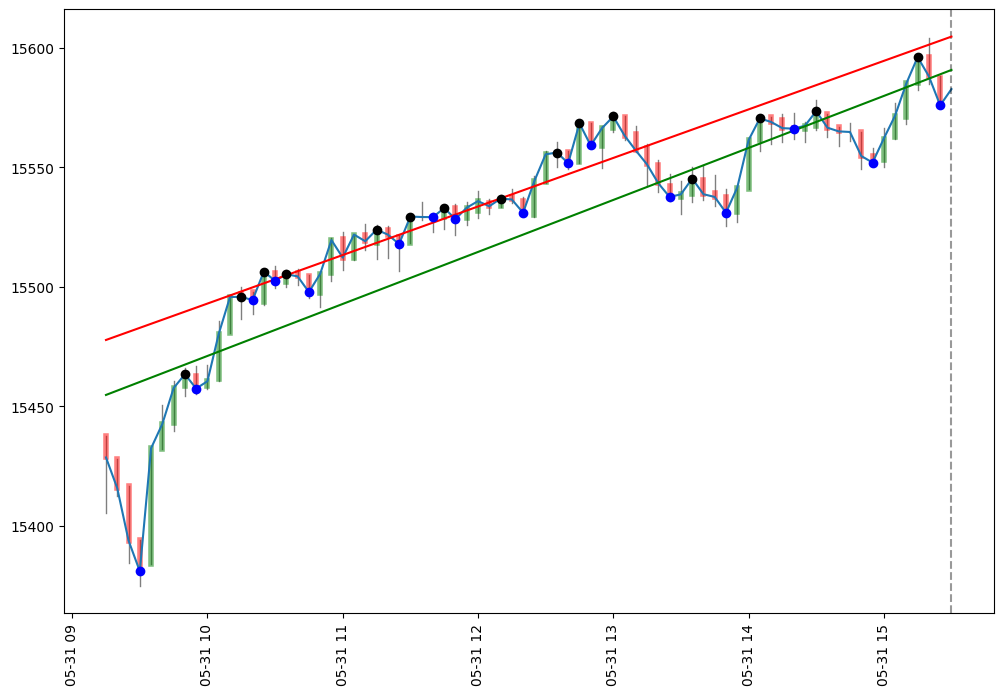

In [4]:
ohlcs = None
testday = '05-31'
testdaystr = f'2021-{testday}'
fname = f'TR01_data/^NSEI-5m-{testdaystr}.pickle'
testdt = datetime.datetime.strptime(testdaystr, '%Y-%m-%d').date()
if(isNonTradingDay(testdt)):
    print('Non trading day')
else:
    if(os.path.exists(fname)):
        with open(fname, 'rb') as ff:
            ohlcs = pickle.load(ff)['testdata']
    else:
        print('downloading...')
        ohlcs = yf.download('^NSEI', start=testdt, end=testdt + datetime.timedelta(days=1), interval='5m')
        if(not ohlcs is None):
            with open(fname, 'wb') as ff:
                pickle.dump({'testdata': ohlcs}, ff)


# n_test = round(len(ohlcs)/3)
if(not ohlcs is None):
    n_test = 1
    n_test_idx = ohlcs.index[-n_test]
    hist = ohlcs.loc[:n_test_idx]
    test = ohlcs.loc[n_test_idx:]
    mins, maxs = trendln.calc_support_resistance(hist.Close, accuracy=2)

    (minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs,
                                                    pmax, maxtrend, maxwindows) = mins, maxs
    psup = np.poly1d([pmin[0], pmin[1]])
    pres = np.poly1d([pmax[0], pmax[1]])
    plt.rcParams['figure.figsize'] = [12, 8]
    plt.rcParams['figure.dpi'] = 100 # 
    ax = plt.gca()
    candle.timeplot(ax, ohlcs)
    ax.plot(ohlcs.index, ohlcs.Close)
    ax.axvline(n_test_idx, color='#000000', linestyle='--', alpha=0.4)
    ax.plot(ohlcs.index, list(psup(range(len(ohlcs)))), 'g')
    ax.plot(ohlcs.index, list(pres(range(len(ohlcs)))), 'r')
    'ignore the min/max if on the last candle'
    ax.plot(ohlcs.index[maximaIdxs], ohlcs.iloc[maximaIdxs].Close, 'ok')
    ax.plot(ohlcs.index[minimaIdxs], ohlcs.iloc[minimaIdxs].Close, 'ob')
    
    plt.show()

In [76]:
for i,r in hist.iterrows():
    print(r)
    break

Open         15421.200195
High         15453.549805
Low          15420.349609
Close        15430.750000
Adj Close    15430.750000
Volume           0.000000
Name: 2021-05-28 09:15:00+05:30, dtype: float64


In [115]:
a = [1,2,3]

In [117]:
a.reverse?
print(a)

[3, 2, 1]


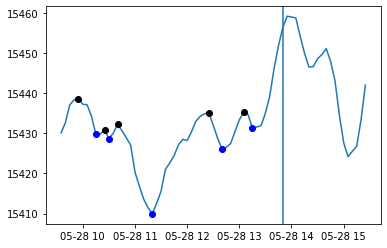

In [10]:
ma3 = ohlcs.Close.rolling(5).mean()
n_test = 20
n_test_idx = ma3.index[-n_test]

mins, maxs = trendln.calc_support_resistance(ma3.loc[:n_test_idx], accuracy=2)

(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs,
                                                pmax, maxtrend, maxwindows) = mins, maxs
psup = np.poly1d([pmin[0], pmin[1]])
pres = np.poly1d([pmax[0], pmax[1]])

ax = plt.gca()
ax.plot(ma3.index, ma3)
ax.axvline(n_test_idx)
#     ax.plot(ohlcs.index, list(psup(range(len(ohlcs)))), 'g')
#     ax.plot(ohlcs.index, list(pres(range(len(ohlcs)))), 'r')
'ignore the min/max if on the last candle'
ax.plot(ma3.index[maximaIdxs], ma3.iloc[maximaIdxs], 'ok')
ax.plot(ma3.index[minimaIdxs], ma3.iloc[minimaIdxs], 'ob')

#     pres1 = np.poly1d((maxtrend[0][1][0], maxtrend[0][1][1]))
#     ax.plot(ohlcs.index[maxtrend[0][0]], pres1(maxtrend[0][0]))

# pres2 = np.poly1d((maxtrend[-1][1][0], maxtrend[-1][1][1] + maxtrend[-1][1][4]))
#ax.plot(ohlcs.index[maxtrend[1][0]], pres2(maxtrend[1][0]))
# ax.plot(ma3.index, pres2(range(len(ma3))))

plt.show()

In [11]:
i=1
maxid = maximaIdxs[-1]
while(maximaIdxs[-(i+1)] > maximaIdxs[-i]):
    maxid = maximaIdxs[-(i+1)]

In [12]:
maxid

46

In [15]:
maximaIdxs

[8, 14, 17, 38, 46]

In [ ]:
minimaIdxs

In [22]:
i=1
minid = minimaIdxs[-1]
while(ma3.iloc[minimaIdxs[-(i+1)]] < ma3.iloc[minimaIdxs[-i]] and (i+1 < len(minimaIdxs))):
    minid = minimaIdxs[-(i+1)]
    i+=1
    print(i)
minid

2
3


25

In [18]:
minimaIdxs

[12, 15, 25, 41, 48]

In [15]:
dt = datetime.datetime(2021,5,31,9,15)
dt

datetime.datetime(2021, 5, 31, 9, 15)

In [10]:
delta = datetime.timedelta(minutes=5)
delta

datetime.timedelta(0, 300)

In [16]:
dt - datetime.timedelta(minutes=dt.minute%5)

datetime.datetime(2021, 5, 31, 9, 15)